In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

import bayesflow as bf

from inverse_kinematics import InverseKinematicsModel

Defaulting to JAX.
To override, set the KERAS_BACKEND environment variable before importing bayesflow.
See: https://keras.io/getting_started/#configuring-your-backend
INFO:2025-11-02 11:08:59,577:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': UNIMPLEMENTED: LoadPjrtPlugin is not implemented on windows yet.
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': UNIMPLEMENTED: LoadPjrtPlugin is not implemented on windows yet.
INFO:bayesflow:Using backend 'jax'


In [ ]:
from bayesflow.simulators import InverseKinematics

In [14]:
sim = InverseKinematics()

In [17]:
obs = np.array([0, 1.5])[None, :]

In [52]:
norms = np.linalg.norm(sim.sample(1000000)["observables"] - obs, axis=1)

In [53]:
np.sum(norms < 0.01)

5

In [54]:
reference = None

In [ ]:
files = os.listdir("samples")

kinematics_samples = {
    f.replace("_inverse_kinematics.npy", ""): np.load(os.path.join("samples", f)) for f in files if "kinematics" in f
}

kinematics_samples_l = list(kinematics_samples.values())

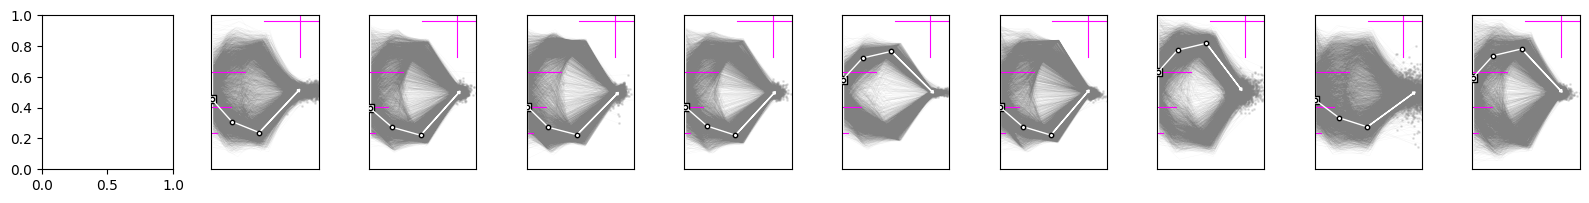

In [ ]:
fig, axarr = plt.subplots(1, len(files) // 2 + 1, figsize=(20, 2))

m = InverseKinematicsModel()

for i, ax in enumerate(axarr[1:]):
     m.update_plot_ax(ax, kinematics_samples_l[i], reference["parameters"][:1000])